#1. CART (Classification and Regression Tree)

Classification

In [3]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

DecisionTreeClassifier()


In [9]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [10]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.93      0.72      0.81        18
           2       1.00      0.92      0.96        12

    accuracy                           0.87        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.87      0.87        45

[[15  0  0]
 [ 5 13  0]
 [ 0  1 11]]


Regression

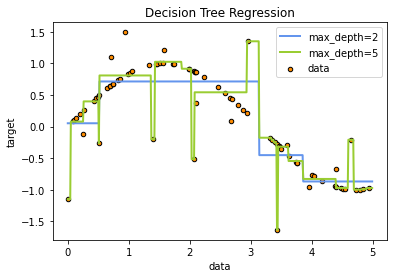

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(criterion="squared_error", max_depth=2)
regr_2 = DecisionTreeRegressor(criterion="squared_error", max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#2. ID3 (Iterative Dichotomiser 3)

범주형 속성값만을 갖는 학습 데이터로부터 엔트로피 개념을 사용하여 결정 트리를 생성  
ID3의 Impurity: 엔트로피 (Entropy)

![이미지](https://tyami.github.io/assets/images/post/ML/2020-09-30-id3/2020-09-30-information-gain-example.png)

In [45]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.461538461538461

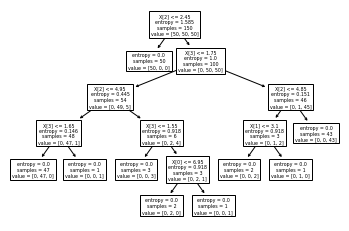

In [46]:
tree.plot_tree(clf)

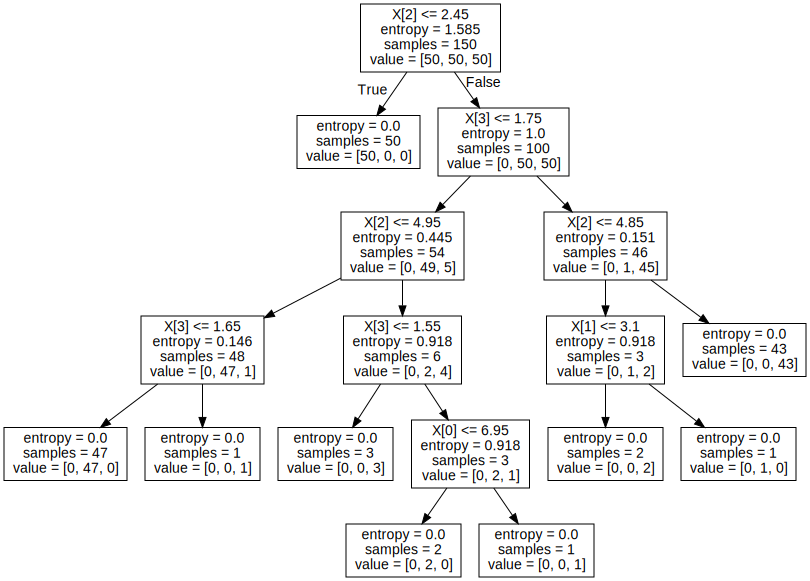

In [47]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [48]:
X_pred = clf.predict(X)

In [49]:
X_pred == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

#3. C4.5

ID3 알고리즘에 비해 개선된 점  
정교한 불순도 지표 (Information gain ratio) 활용 -> 과적합 방지  
입력값으로 범주형 변수 뿐 아니라 연속형 변수를 사용 가능  
결측치가 포함된 데이터도 사용 가능  
과적합을 방지하는 가지치기  

In [52]:
import math
class C45:

	"""Creates a decision tree with C4.5 algorithm"""
	def __init__(self, pathToData,pathToNames):
		self.filePathToData = pathToData
		self.filePathToNames = pathToNames
		self.data = []
		self.classes = []
		self.numAttributes = -1 
		self.attrValues = {}
		self.attributes = []
		self.tree = None

	def fetchData(self):
		with open(self.filePathToNames, "r") as file:
			classes = file.readline()
			self.classes = [x.strip() for x in classes.split(",")]
			#add attributes
			for line in file:
				[attribute, values] = [x.strip() for x in line.split(":")]
				values = [x.strip() for x in values.split(",")]
				self.attrValues[attribute] = values
		self.numAttributes = len(self.attrValues.keys())
		self.attributes = list(self.attrValues.keys())
		with open(self.filePathToData, "r") as file:
			for line in file:
				row = [x.strip() for x in line.split(",")]
				if row != [] or row != [""]:
					self.data.append(row)

	def preprocessData(self):
		for index,row in enumerate(self.data):
			for attr_index in range(self.numAttributes):
				if(not self.isAttrDiscrete(self.attributes[attr_index])):
					self.data[index][attr_index] = float(self.data[index][attr_index])

	def printTree(self):
		self.printNode(self.tree)

	def printNode(self, node, indent=""):
		if not node.isLeaf:
			if node.threshold is None:
				#discrete
				for index,child in enumerate(node.children):
					if child.isLeaf:
						print(indent + node.label + " = " + attributes[index] + " : " + child.label)
					else:
						print(indent + node.label + " = " + attributes[index] + " : ")
						self.printNode(child, indent + "	")
			else:
				#numerical
				leftChild = node.children[0]
				rightChild = node.children[1]
				if leftChild.isLeaf:
					print(indent + node.label + " <= " + str(node.threshold) + " : " + leftChild.label)
				else:
					print(indent + node.label + " <= " + str(node.threshold)+" : ")
					self.printNode(leftChild, indent + "	")

				if rightChild.isLeaf:
					print(indent + node.label + " > " + str(node.threshold) + " : " + rightChild.label)
				else:
					print(indent + node.label + " > " + str(node.threshold) + " : ")
					self.printNode(rightChild , indent + "	")



	def generateTree(self):
		self.tree = self.recursiveGenerateTree(self.data, self.attributes)

	def recursiveGenerateTree(self, curData, curAttributes):
		allSame = self.allSameClass(curData)

		if len(curData) == 0:
			#Fail
			return Node(True, "Fail", None)
		elif allSame is not False:
			#return a node with that class
			return Node(True, allSame, None)
		elif len(curAttributes) == 0:
			#return a node with the majority class
			majClass = self.getMajClass(curData)
			return Node(True, majClass, None)
		else:
			(best,best_threshold,splitted) = self.splitAttribute(curData, curAttributes)
			remainingAttributes = curAttributes[:]
			remainingAttributes.remove(best)
			node = Node(False, best, best_threshold)
			node.children = [self.recursiveGenerateTree(subset, remainingAttributes) for subset in splitted]
			return node

	def getMajClass(self, curData):
		freq = [0]*len(self.classes)
		for row in curData:
			index = self.classes.index(row[-1])
			freq[index] += 1
		maxInd = freq.index(max(freq))
		return self.classes[maxInd]


	def allSameClass(self, data):
		for row in data:
			if row[-1] != data[0][-1]:
				return False
		return data[0][-1]

	def isAttrDiscrete(self, attribute):
		if attribute not in self.attributes:
			raise ValueError("Attribute not listed")
		elif len(self.attrValues[attribute]) == 1 and self.attrValues[attribute][0] == "continuous":
			return False
		else:
			return True

	def splitAttribute(self, curData, curAttributes):
		splitted = []
		maxEnt = -1*float("inf")
		best_attribute = -1
		#None for discrete attributes, threshold value for continuous attributes
		best_threshold = None
		for attribute in curAttributes:
			indexOfAttribute = self.attributes.index(attribute)
			if self.isAttrDiscrete(attribute):
				#split curData into n-subsets, where n is the number of 
				#different values of attribute i. Choose the attribute with
				#the max gain
				valuesForAttribute = self.attrValues[attribute]
				subsets = [[] for a in valuesForAttribute]
				for row in curData:
					for index in range(len(valuesForAttribute)):
						if row[i] == valuesForAttribute[index]:
							subsets[index].append(row)
							break
				e = gain(curData, subsets)
				if e > maxEnt:
					maxEnt = e
					splitted = subsets
					best_attribute = attribute
					best_threshold = None
			else:
				#sort the data according to the column.Then try all 
				#possible adjacent pairs. Choose the one that 
				#yields maximum gain
				curData.sort(key = lambda x: x[indexOfAttribute])
				for j in range(0, len(curData) - 1):
					if curData[j][indexOfAttribute] != curData[j+1][indexOfAttribute]:
						threshold = (curData[j][indexOfAttribute] + curData[j+1][indexOfAttribute]) / 2
						less = []
						greater = []
						for row in curData:
							if(row[indexOfAttribute] > threshold):
								greater.append(row)
							else:
								less.append(row)
						e = self.gain(curData, [less, greater])
						if e >= maxEnt:
							splitted = [less, greater]
							maxEnt = e
							best_attribute = attribute
							best_threshold = threshold
		return (best_attribute,best_threshold,splitted)

	def gain(self,unionSet, subsets):
		#input : data and disjoint subsets of it
		#output : information gain
		S = len(unionSet)
		#calculate impurity before split
		impurityBeforeSplit = self.entropy(unionSet)
		#calculate impurity after split
		weights = [len(subset)/S for subset in subsets]
		impurityAfterSplit = 0
		for i in range(len(subsets)):
			impurityAfterSplit += weights[i]*self.entropy(subsets[i])
		#calculate total gain
		totalGain = impurityBeforeSplit - impurityAfterSplit
		return totalGain

	def entropy(self, dataSet):
		S = len(dataSet)
		if S == 0:
			return 0
		num_classes = [0 for i in self.classes]
		for row in dataSet:
			classIndex = list(self.classes).index(row[-1])
			num_classes[classIndex] += 1
		num_classes = [x/S for x in num_classes]
		ent = 0
		for num in num_classes:
			ent += num*self.log(num)
		return ent*-1


	def log(self, x):
		if x == 0:
			return 0
		else:
			return math.log(x,2)

class Node:
	def __init__(self,isLeaf, label, threshold):
		self.label = label
		self.threshold = threshold
		self.isLeaf = isLeaf
		self.children = []

In [ ]:
import pdb
from c45 import C45

c1 = C45("../data/iris/iris.data", "../data/iris/iris.names")
c1.fetchData()
c1.preprocessData()
c1.generateTree()
c1.printTree()